In [1]:
import astunparse

from moa.frontend import MOAParser
from moa.visualize import visualize_ast
from moa.shape import calculate_shapes
from moa.reduction import reduce_ast
from moa.backend import python_backend

parser = MOAParser()

# Frontend

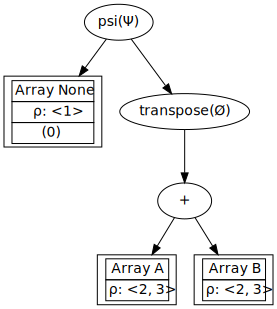

In [2]:
ast = parser.parse('<0> psi (tran(A ^ <2 3> + B ^ <2 3>))')
visualize_ast(ast)

# Shape Analysis

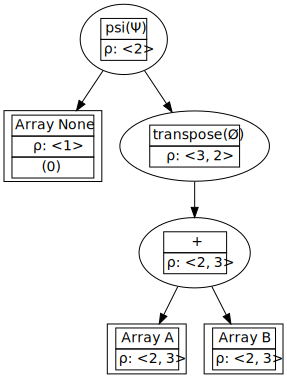

In [3]:
shape_ast = calculate_shapes(ast)
visualize_ast(shape_ast)

# Reduction

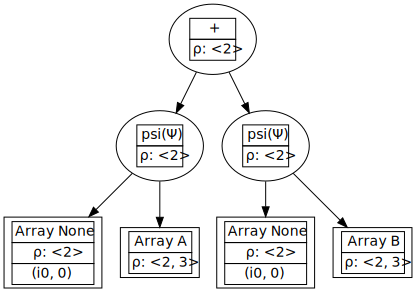

In [4]:
symbol_table, reduced_ast = reduce_ast(shape_ast)
visualize_ast(reduced_ast)

# Backend (Python)

In [5]:
ast = python_backend(reduced_ast)
print(astunparse.dump(ast))

BinOp(
  left=Subscript(
    value=Name(
      id='A',
      ctx=Load()),
    slice=Index(value=Tuple(
      elts=[
        Str(s='i0'),
        Num(n=0)],
      ctx=Load())),
    ctx=Load()),
  op=Add(),
  right=Subscript(
    value=Name(
      id='B',
      ctx=Load()),
    slice=Index(value=Tuple(
      elts=[
        Str(s='i0'),
        Num(n=0)],
      ctx=Load())),
    ctx=Load()))


In [6]:
print(astunparse.unparse(ast))

(A[('i0', 0)] + B[('i0', 0)])

